In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

N = 30

df = df.with_columns([
    pl.col('taker_buy_quote_volume').rolling_sum(N).over('symbol').alias('taker_buy_quote_volume_sum'),
    pl.col('taker_sell_quote_volume').rolling_sum(N).over('symbol').alias('taker_sell_quote_volume_sum'),
])

df = df.with_columns([
    (pl.col('taker_buy_quote_volume_sum') - pl.col('taker_sell_quote_volume_sum')).alias('net_taker_quote_volume'),
    (pl.col('taker_buy_quote_volume_sum') + pl.col('taker_sell_quote_volume_sum')).alias('total_taker_quote_volume')
])

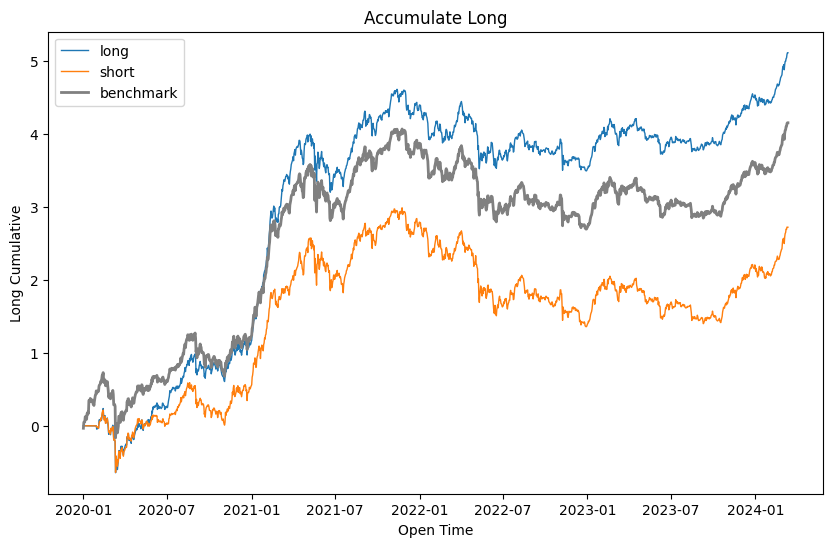

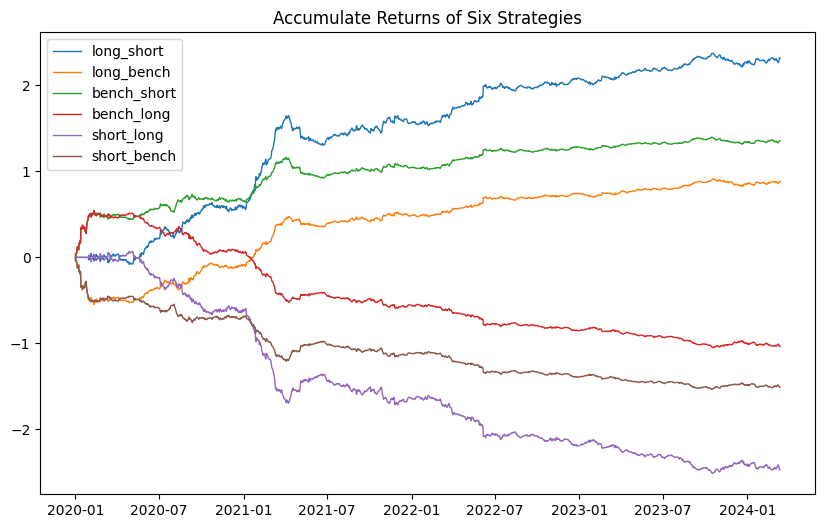

long: 
ann_return = 29.2338  sharpe = 6.4835  maxdd = 0.7122  calmar_ratio = 41.0477  

short: 
ann_return = 15.5578  sharpe = 3.4345  maxdd = 0.7031  calmar_ratio = 22.1266  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 13.238  sharpe = 10.8895  maxdd = 0.1301  calmar_ratio = 101.7568  

long_bench: 
ann_return = 5.051  sharpe = 5.3862  maxdd = 0.5632  calmar_ratio = 8.9682  

bench_long: 
ann_return = -5.927  sharpe = -6.3204  maxdd = 1.0332  calmar_ratio = -5.7363  

short_long: 
ann_return = -14.114  sharpe = -11.6101  maxdd = 2.4105  calmar_ratio = -5.8551  

short_bench: 
ann_return = -8.625  sharpe = -9.5114  maxdd = 1.5192  calmar_ratio = -5.6773  

bench_short: 
ann_return = 7.749  sharpe = 8.5454  maxdd = 0.1112  calmar_ratio = 69.6618  



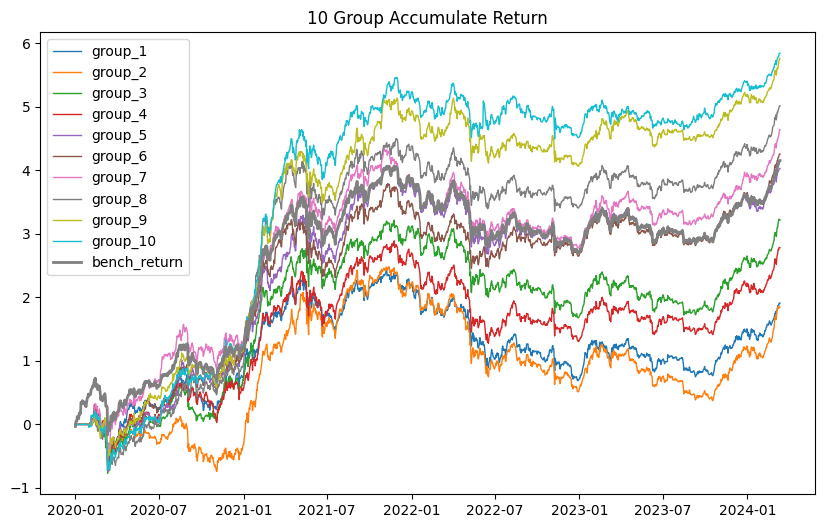

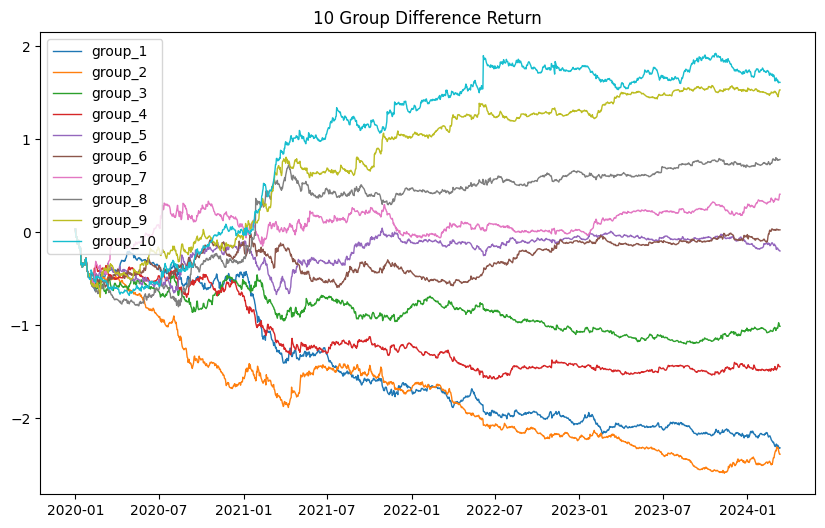

group_1: 
ann_return = 10.918  sharpe = 2.4732  maxdd = 0.6273  calmar_ratio = 17.4037  

group_2: 
ann_return = 10.5276  sharpe = 2.2152  maxdd = 0.7884  calmar_ratio = 13.3529  

group_3: 
ann_return = 18.3953  sharpe = 3.8431  maxdd = 0.8019  calmar_ratio = 22.9403  

group_4: 
ann_return = 15.9105  sharpe = 3.3226  maxdd = 0.6947  calmar_ratio = 22.9036  

group_5: 
ann_return = 23.0302  sharpe = 4.822  maxdd = 0.6595  calmar_ratio = 34.9233  

group_6: 
ann_return = 24.3289  sharpe = 5.1785  maxdd = 0.7908  calmar_ratio = 30.7663  

group_7: 
ann_return = 26.523  sharpe = 5.5351  maxdd = 0.6623  calmar_ratio = 40.0481  

group_8: 
ann_return = 28.6576  sharpe = 5.8759  maxdd = 0.7558  calmar_ratio = 37.9154  

group_9: 
ann_return = 32.9361  sharpe = 7.0154  maxdd = 0.5805  calmar_ratio = 56.7357  

group_10: 
ann_return = 33.3991  sharpe = 7.1078  maxdd = 0.77  calmar_ratio = 43.3751  

-----------------------------------------
group_difference_1: 
ann_return = -13.2649  sharpe =

In [2]:
factors = df.select(['open_time', 'symbol', 'net_taker_quote_volume'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()